In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Question 1

(510, 510)


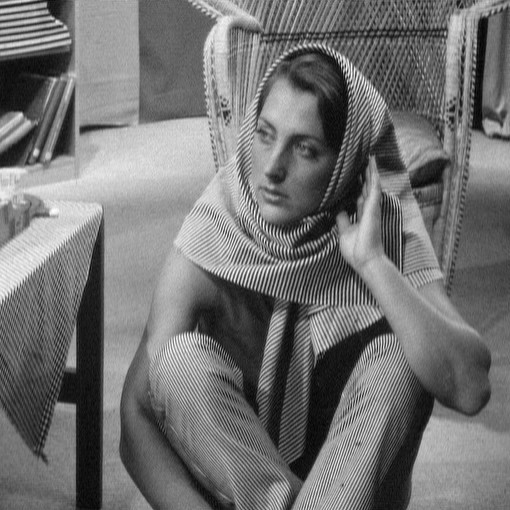

In [ ]:
barbara_img = cv2.imread("/content/barbara.jpg")[:,:,0]
print(barbara_img.shape)
cv2_imshow(barbara_img)

**(a)**

bits: 2 gray_levels: 4


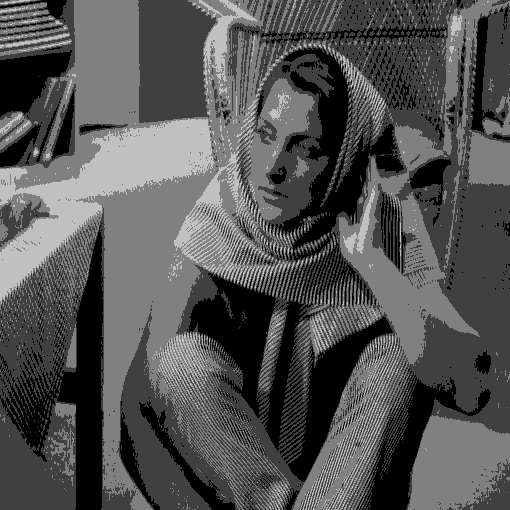


bits: 4 gray_levels: 16


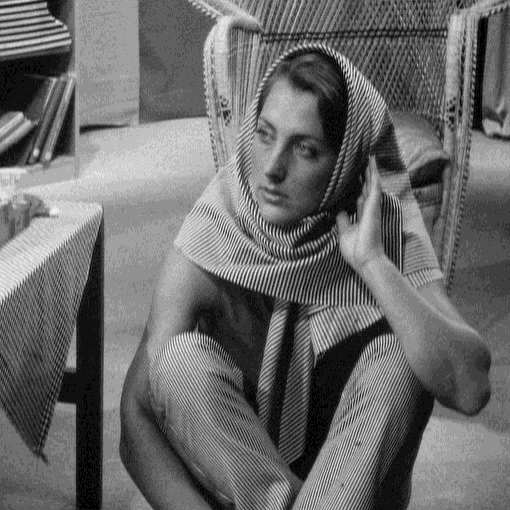


bits: 8 gray_levels: 256


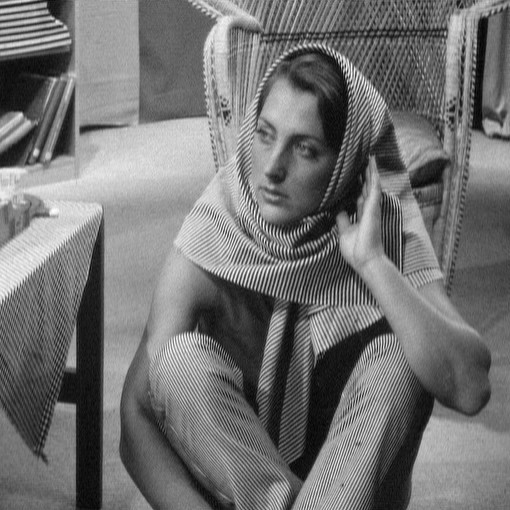

In [ ]:
# K=2,4,8
gray_level1 = 2**2
print("bits:",2,"gray_levels:",gray_level1)
barbara_img1 = barbara_img.copy()
for i in range(barbara_img.shape[0]):
  for j in range(barbara_img.shape[1]): 

      if barbara_img1[i,j]<=63:
        barbara_img1[i,j] = 0

      elif barbara_img1[i,j]>=64 and barbara_img1[i,j]<=127:
        barbara_img1[i,j] = 64
      
      elif barbara_img1[i,j]>=128 and barbara_img1[i,j]<=191:
        barbara_img1[i,j] = 128
      
      elif barbara_img1[i,j]>=192 and barbara_img1[i,j]<=255:
        barbara_img1[i,j] = 192

cv2_imshow(barbara_img1)


gray_level2 = (2**4)
print("\nbits:",4,"gray_levels:",gray_level2)
value2 = 256//gray_level2
barbara_img2 = barbara_img.copy()
barbara_img2 = (barbara_img2//value2)*value2
cv2_imshow(barbara_img2) 


gray_level3 = (2**8)
print("\nbits:",8,"gray_levels:",gray_level3)
value3 = 256//gray_level3
barbara_img3 = barbara_img.copy()
barbara_img3 = (barbara_img3//value3)*value3
cv2_imshow(barbara_img3)




**(b)**

k: 2


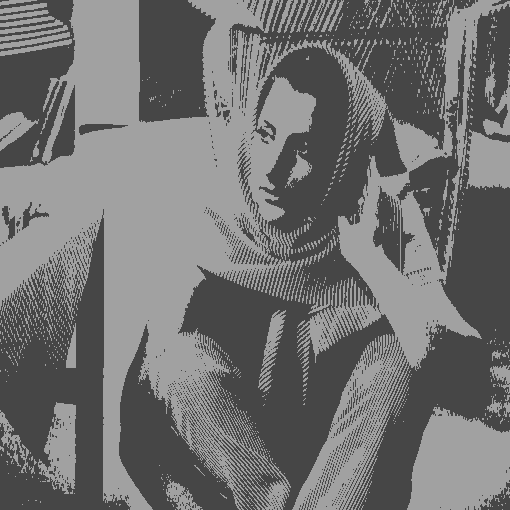



k: 8


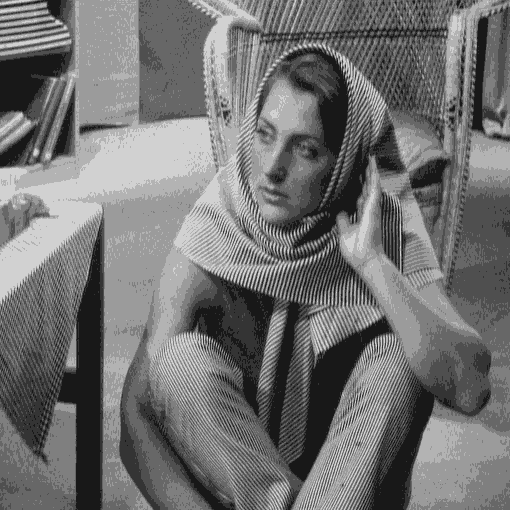



k: 16


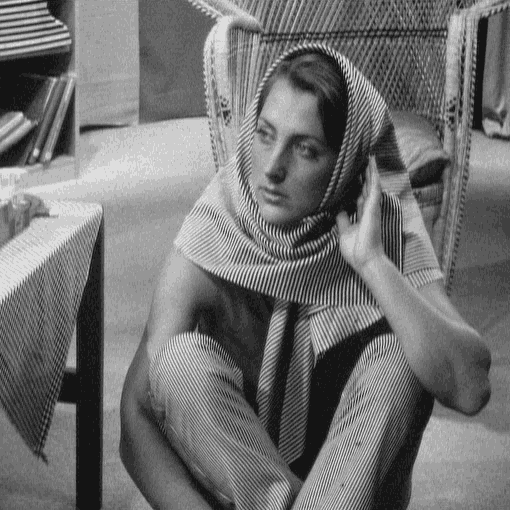



k: 32


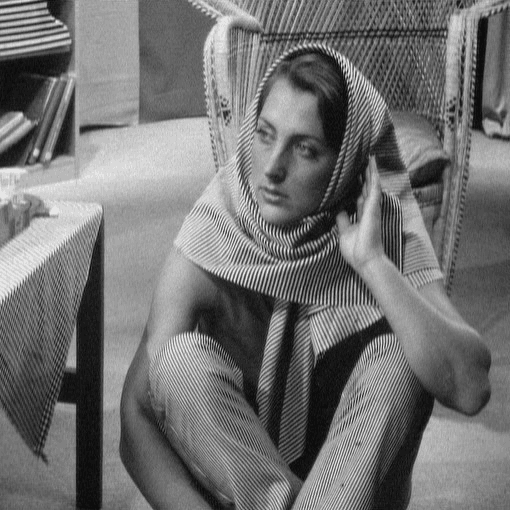



k: 40


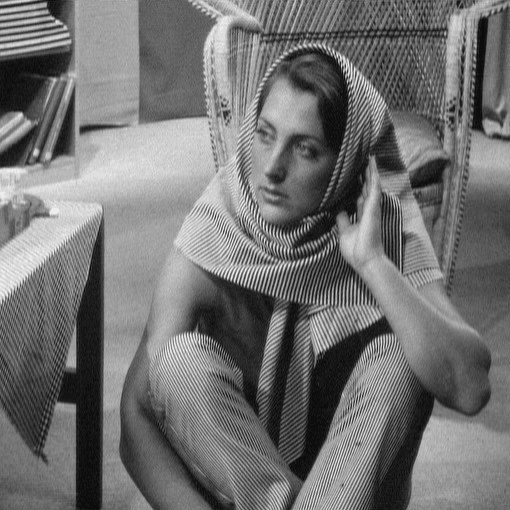

In [ ]:
from sklearn.cluster import KMeans

flatten_barbara_img = barbara_img.flatten()
flatten_barbara_img = flatten_barbara_img.reshape(-1,1)
K = 2,8,16,32,40
for k in K:
  model = KMeans(n_clusters=k)
  model.fit(flatten_barbara_img)
  labels = model.labels_
  centroids = (model.cluster_centers_).astype(int)
  quantized_flattening = centroids[labels]
  quantized_image = quantized_flattening.reshape(barbara_img.shape[0],barbara_img.shape[1])
  print("k:",k)
  cv2_imshow(quantized_image)
  print("\n")




# Question 5

(1000, 683)


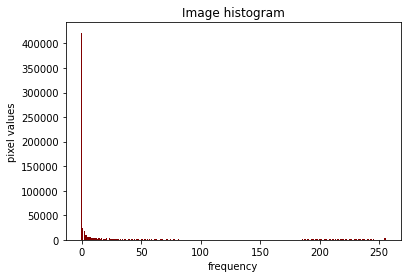

mean: 31.7340439238653
standard_deviation: 69.32477716203749
Image contrast stretching


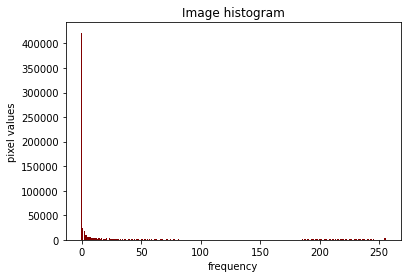

mean: 31.7340439238653
standard_deviation: 69.32477716203749

moon img


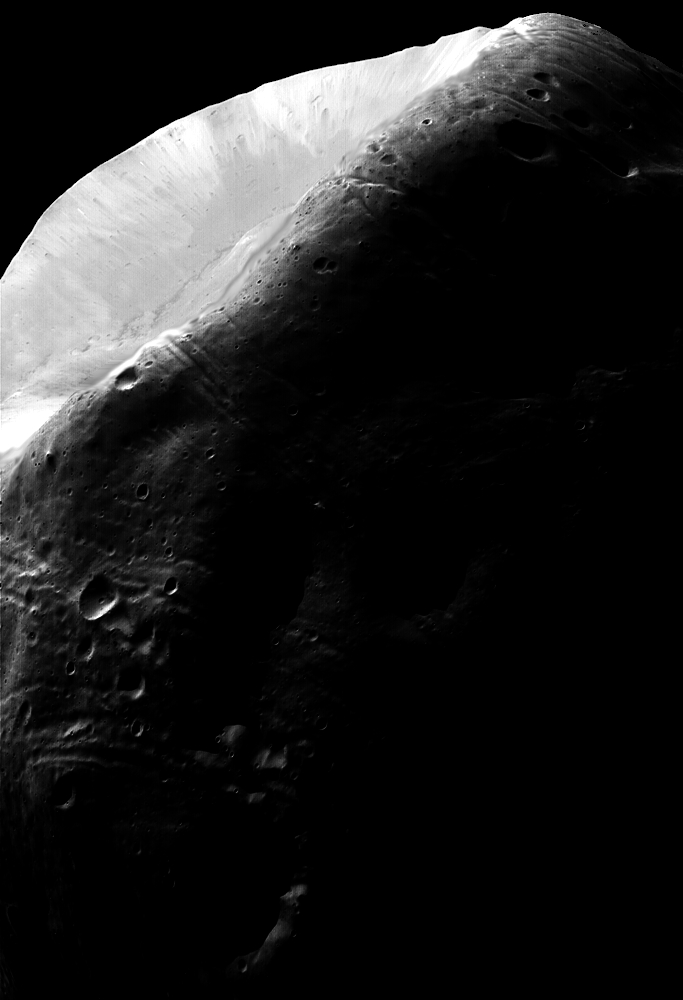


new moon img


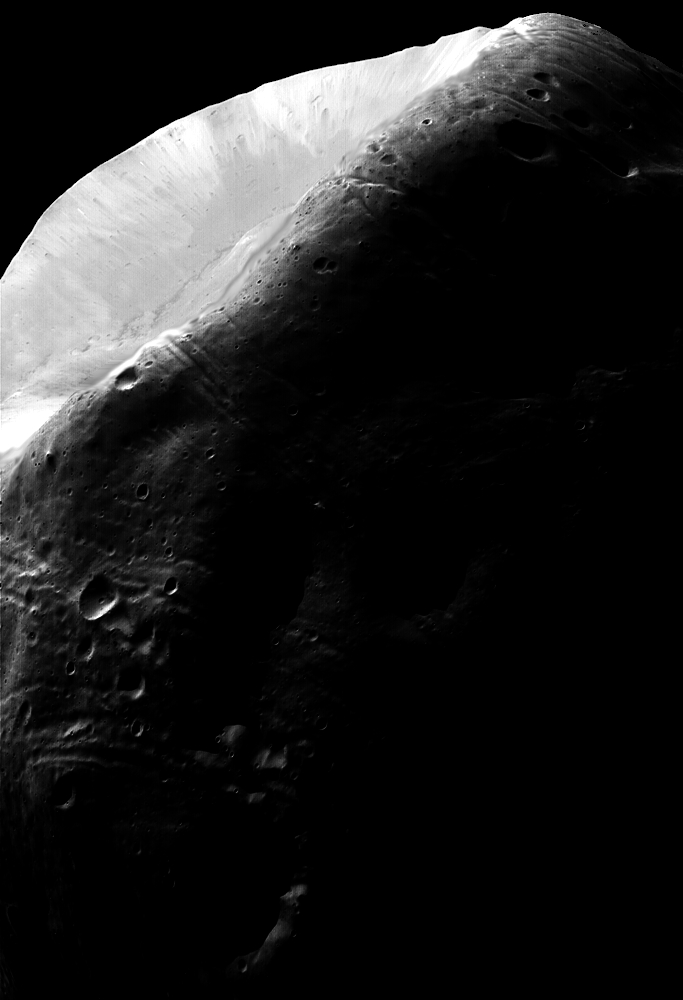

In [35]:
import matplotlib.pyplot as plt
from copy import deepcopy

moon_img = cv2.imread("/content/moon.tif")[:,:,0]
print(moon_img.shape)

def histogram(img):

    pixel_dictionary = dict()
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if img[i,j] not in pixel_dictionary:
          pixel_dictionary[img[i,j]] = 1

        elif img[i,j] in pixel_dictionary:
          pixel_dictionary[img[i,j]] += 1

    plt.bar(list(pixel_dictionary.keys()), list(pixel_dictionary.values()), color ='maroon',width = 0.9)
    plt.xlabel("frequency")
    plt.ylabel("pixel values")
    plt.title("Image histogram")
    plt.show()

    mean = 0
    for k in pixel_dictionary.keys():
      mean += (k*pixel_dictionary[k]) 

    mean = mean/np.sum(list(pixel_dictionary.values()))
    print("mean:",mean)
    print("standard_deviation:",np.std(img.flatten()))


histogram(moon_img)

print("Image contrast stretching")

img1 = copy.deepcopy(moon_img)
img_min = np.min(img1)
img_max = np.max(img1)
for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    img1[i,j] = int(((img1[i,j]-img_min)/(img_max-img_min))*255) 

histogram(img1)
print("\nmoon img")
cv2_imshow(moon_img)
print("\nnew moon img")
cv2_imshow(img1)


(1000, 683)


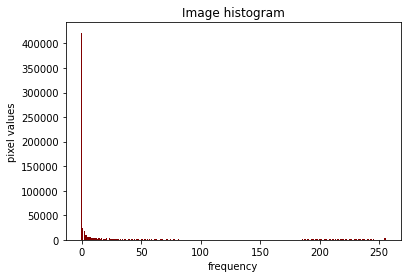

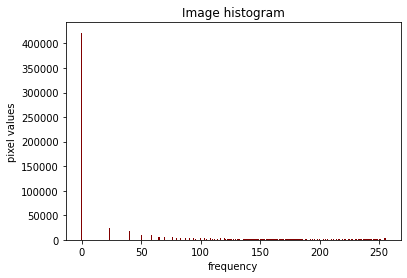

mean: 49.810055636896045
old standard_deviation: 69.32477716203749
new standard_deviation: 76.98612470426602

moon img


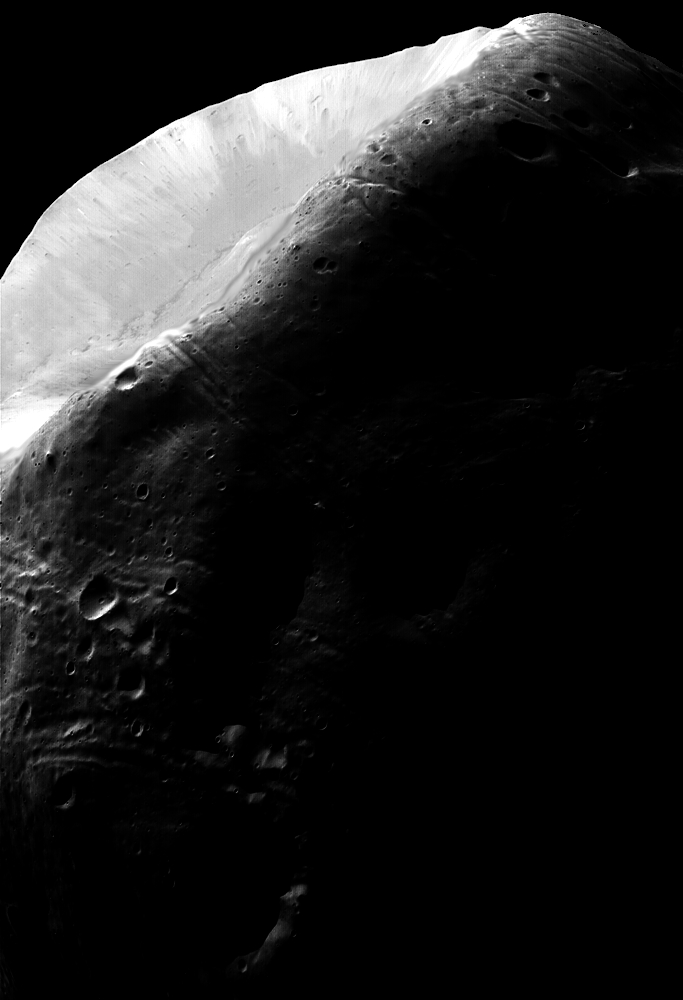


new moon img


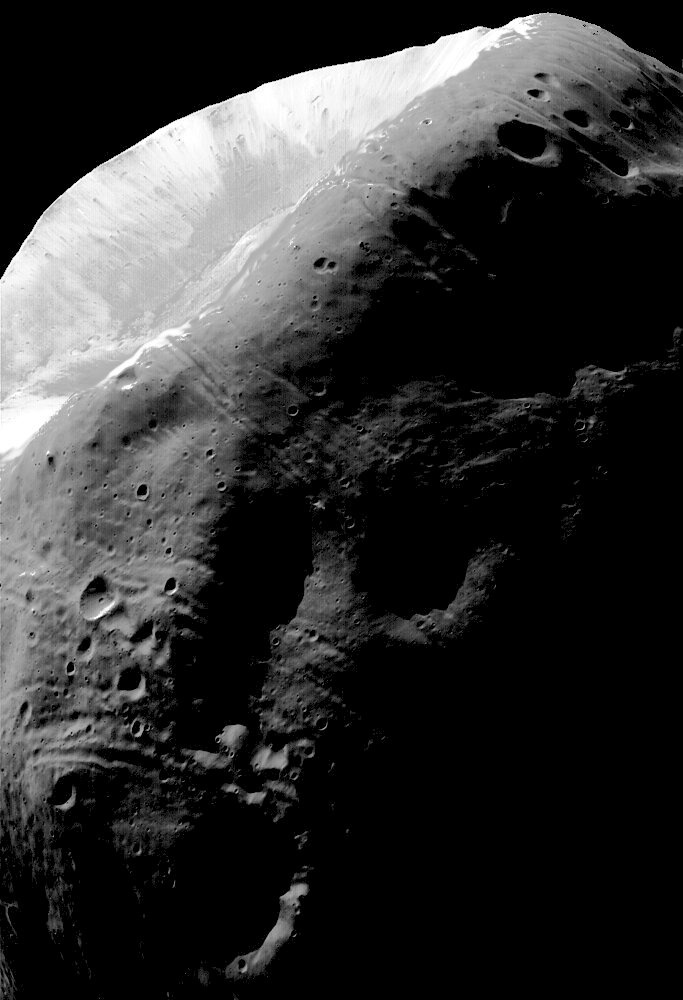

In [37]:
import copy
import cv2
import matplotlib.pyplot as plt
def histogram_equalization(img):

  ascending_pixel_values = np.zeros(256)
  cdf = np.zeros(256)
  new_dictionary = dict()
  new_img = copy.deepcopy(img)

  dictionary = dict()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i,j] not in dictionary:
        dictionary[img[i,j]] = 1

      elif img[i,j] in dictionary:
        dictionary[img[i,j]] += 1

  plt.bar(list(dictionary.keys()), list(dictionary.values()), color ='maroon',width = 0.9)
  plt.xlabel("frequency")
  plt.ylabel("pixel values")
  plt.title("Image histogram")
  plt.show()

  for k in dictionary:
    ascending_pixel_values[k] = dictionary[k]

  cdf[0] = ascending_pixel_values[0]
  
  for i in range(1,len(cdf)):
    cdf[i] = cdf[i-1] + ascending_pixel_values[i] 

  cdf_min = np.min(cdf)
  for v in range(len(cdf)):
    new_dictionary[v] = np.round(((cdf[v]-cdf_min)/((img.shape[0]*img.shape[1])-cdf_min))*(256-1))
  
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i][j] = new_dictionary[img[i][j]]

  new_pixel_dictionary = dict()
  for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
      if new_img[i,j] not in new_pixel_dictionary:
        new_pixel_dictionary[new_img[i,j]] = 1

      elif new_img[i,j] in new_pixel_dictionary:
        new_pixel_dictionary[new_img[i,j]] += 1

  plt.bar(list(new_pixel_dictionary.keys()), list(new_pixel_dictionary.values()), color ='maroon',width = 0.9)
  plt.xlabel("frequency")
  plt.ylabel("pixel values")
  plt.title("Image histogram")
  plt.show()

  mean = 0
  for k in new_pixel_dictionary.keys():
    mean += (k*new_pixel_dictionary[k]) 

  mean = mean/np.sum(list(new_pixel_dictionary.values()))
  print("mean:",mean)

  print("old standard_deviation:",np.std(img.flatten()))
  print("new standard_deviation:",np.std(new_img.flatten()))
  
  print("\nmoon img")
  cv2_imshow(moon_img)
  print("\nnew moon img")
  cv2_imshow(new_img)


moon_img = cv2.imread("/content/moon.tif")[:,:,0]
print(moon_img.shape)
histogram_equalization(moon_img)




#Question 3


translated image


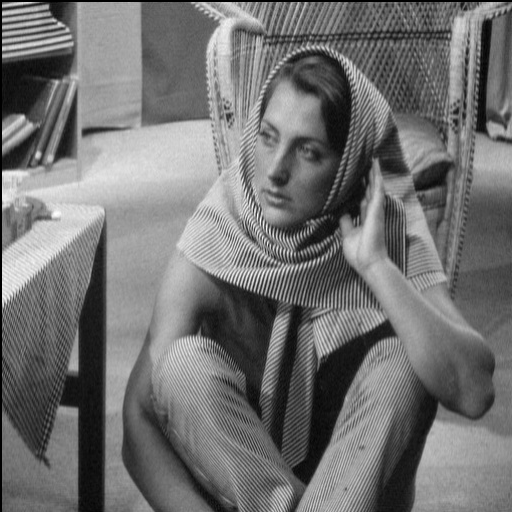


scaled image


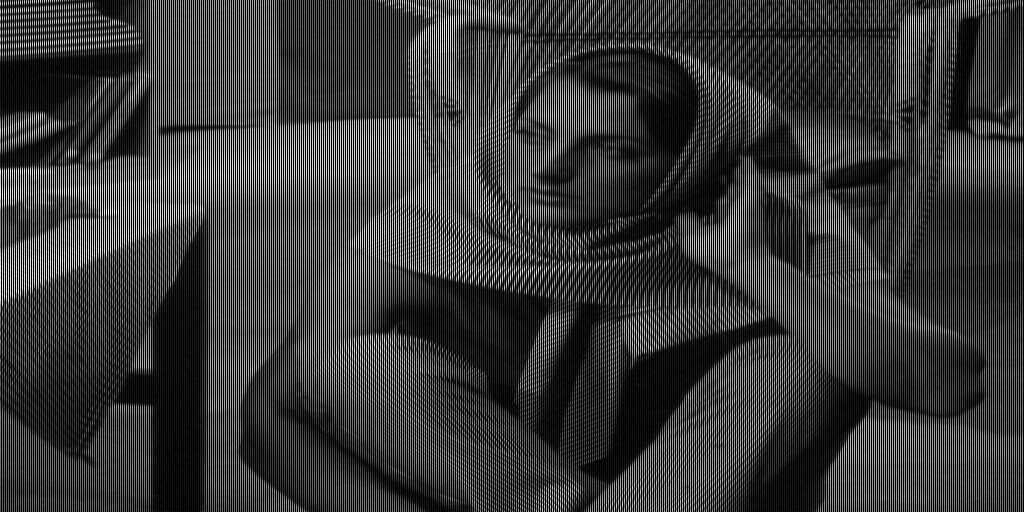


rotated image


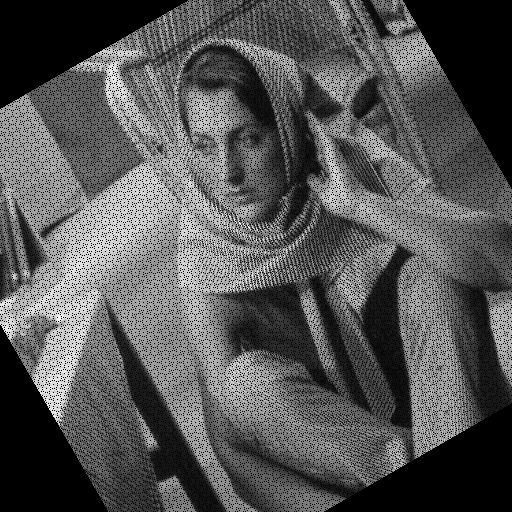


rotated image

scaled image

translated image


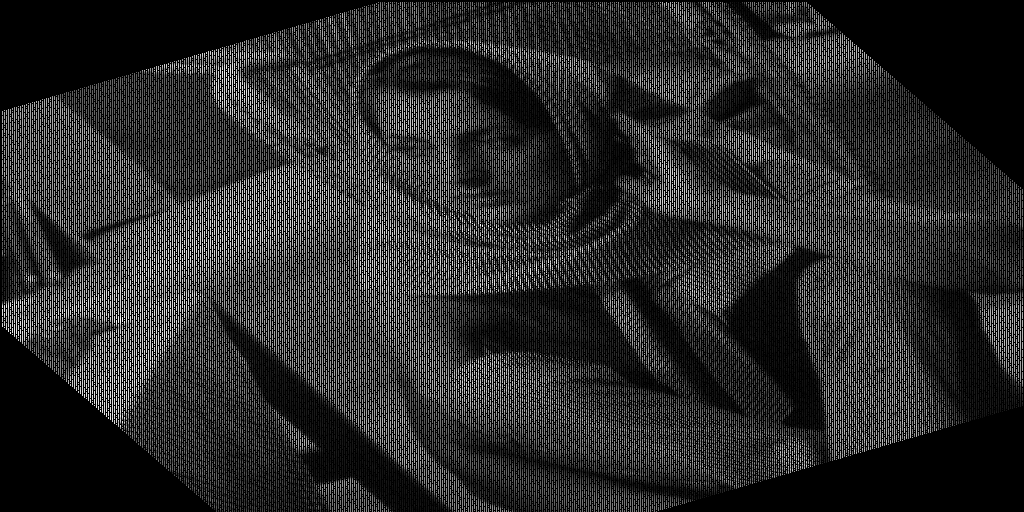

In [192]:
## translation
def translation(x,y,tx,ty):
  translation_matrix = np.array([[1,0,tx],
                                 [0,1,ty],
                                 [0,0,1]])
  col_array = np.array([x,y,1]).reshape((3,1))
  new_cordinates = np.matmul(translation_matrix,col_array)[:,0]

  return new_cordinates

def perform_translation(img,tx,ty,show=False):
  new_img = np.zeros((img.shape[0],img.shape[1]))

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_cordinates=translation(j,i,tx,ty)
      if new_cordinates[1]<img.shape[0] and new_cordinates[0]<img.shape[1]:
        new_img[new_cordinates[1]][new_cordinates[0]] = img[i][j]

  print("\ntranslated image")
  if show:
    cv2_imshow(new_img)
  return new_img



## scaling
def scaling(x,y,sx,sy=1):
  scaling_matrix = np.array([[sx,0,0],
                                 [0,sy,0],
                                 [0,0,1]])
  col_array = np.array([x,y,1]).reshape((3,1))
  new_cordinates = np.matmul(scaling_matrix,col_array)[:,0]

  return new_cordinates

def perform_scaling(img,sx,sy=1,show=False):
  new_img = np.zeros((img.shape[0],img.shape[1]*2))

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_cordinates=scaling(j,i,sx,sy)
      new_img[new_cordinates[1]][new_cordinates[0]] = img[i][j]

  print("\nscaled image")
  if show:
    cv2_imshow(new_img)
  return new_img
  



## rotation 
def rotation(x,y,angle,centre_of_rotation):
  theta = angle * (np.pi/180)

  rotation_matrix = np.array([[np.cos(theta),-np.sin(theta),0],
                                 [np.sin(theta),np.cos(theta),0],
                                 [0,0,1]])
  
  col_array = np.array([x-centre_of_rotation[0],y-centre_of_rotation[1],1]).reshape((3,1))
  new_cordinates = np.matmul(rotation_matrix,col_array)[:,0]

  x_dash = centre_of_rotation[0] + int(new_cordinates[0])
  y_dash = centre_of_rotation[1] + int(new_cordinates[1])
  new_cordinates=[x_dash,y_dash,1]

  return new_cordinates

def perform_rotation(img,angle,show=False):
  new_img = np.zeros((img.shape[0],img.shape[1]))
  centre_of_rotation = (img.shape[0]//2,img.shape[1]//2)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_cordinates=rotation(j,i,angle,centre_of_rotation)
      if 0<=new_cordinates[1]<img.shape[0] and new_cordinates[0]<img.shape[1] and new_cordinates[0]>=0 and new_cordinates[1]>=0 :
        new_img[new_cordinates[1]][new_cordinates[0]] = img[i][j]

  print("\nrotated image")
  if show:
    cv2_imshow(new_img)
  return new_img



def main():
  img = cv2.imread('/content/barbara.jpg')[:,:,0]
  img_t = perform_translation(img,2,2,show=True)
  img_s = perform_scaling(img,2,1,show=True)
  img_r = perform_rotation(img,-30,show=True)
          
  img_comb = perform_translation((perform_scaling((perform_rotation(img,-30)),2,1)),2,2)
  cv2_imshow(img_comb)




main()

#Question 2


**Linear Interpolation**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


original_img: (510, 510)


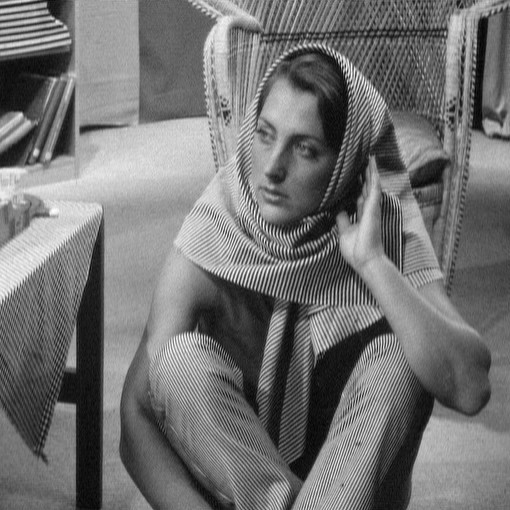


Upscaled interpolated image
upscale image: (1020, 1020)


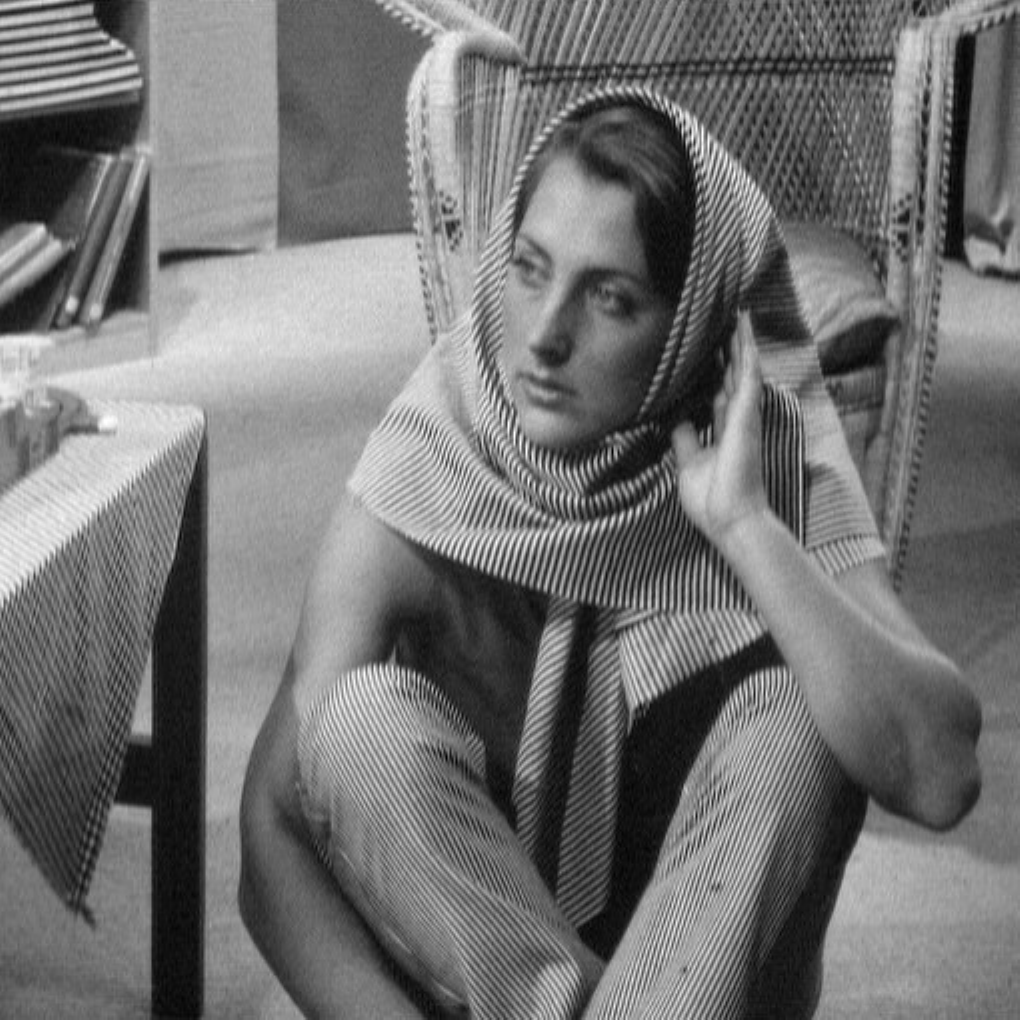


Downscaled interpolated image
downscale image: (510, 510)


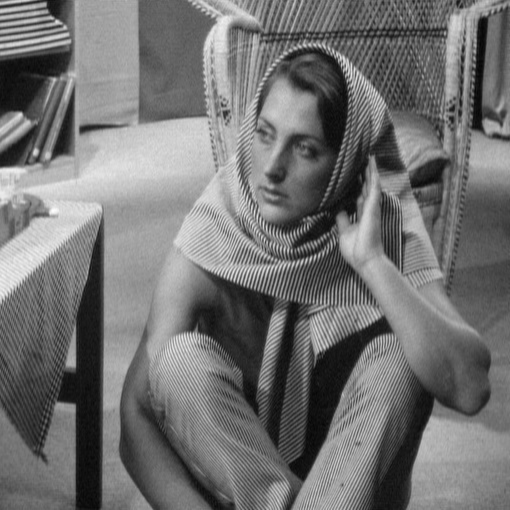

In [ ]:
def linear_interpolation_kernel_upscaling(X_m_n,X_m_n_1):

  a=0.5
  interpolation_value = ((1-a)*X_m_n) + (a*X_m_n_1)

  return interpolation_value

  
def padding(img,upscale_factor):

  new_img = np.zeros((img.shape[0]*upscale_factor,img.shape[1]*upscale_factor))
  ctr_i=0
  for i in range(new_img.shape[0]):
    ctr_j=0
    for j in range(new_img.shape[1]):
        if i%2==0 and j%2==0:
          new_img[i][j] = img[ctr_i][ctr_j]
          ctr_j += 1
    if i%2!=0:
      ctr_i += 1     

  #padded_filling last row and last column
  for i in range(new_img.shape[0]):
    new_img[i][new_img.shape[1]-1] = new_img[i][new_img.shape[1]-2]
  for j in range(new_img.shape[1]):
    new_img[new_img.shape[0]-1][j] = new_img[new_img.shape[0]-2][j] 

  return new_img


def perform_linear_interpolation(barbara_img,upscale_factor,show=False):

  new_img = padding(barbara_img,upscale_factor)
  
  # interpolating row-wise
  for i in range(0,new_img.shape[0],upscale_factor):
    for j in range(1,new_img.shape[1]-2,upscale_factor):
      new_img[i][j] = linear_interpolation_kernel_upscaling(new_img[i][j-1],new_img[i][j+1])

  # interpolating col-wise
  for i in range(1,new_img.shape[0]-2,upscale_factor):
    for j in range(0,new_img.shape[1]-1):
      new_img[i][j] = linear_interpolation_kernel_upscaling(new_img[i-1][j],new_img[i+1][j])

  #filling last row and last column
  for i in range(new_img.shape[0]):
    new_img[i][new_img.shape[1]-1] = new_img[i][new_img.shape[1]-2]
  for j in range(new_img.shape[1]):
    new_img[new_img.shape[0]-1][j] = new_img[new_img.shape[0]-2][j] 
  
  print("\nUpscaled interpolated image")
  if show:
    print("upscale image:",new_img.shape)
    cv2_imshow(new_img)

  return new_img


def linear_interpolation_kernel_downscaling(X_m_n,X_m_n_1,X_m_1_n,X_m_1_n_1):

  interpolation_value = 0.25*X_m_n+0.25*X_m_n_1+0.25*X_m_1_n+0.25*X_m_1_n_1

  return interpolation_value

def perform_downscale_linear_interpolation(img,downscale_factor,show=False):
  new_img = np.zeros((img.shape[0]//downscale_factor,img.shape[1]//downscale_factor),dtype='int')
  for i in range(0,img.shape[0]-1,downscale_factor):
    for j in range(0,img.shape[1]-1,downscale_factor):
      new_img[int(i//2)][int(j//2)] = linear_interpolation_kernel_downscaling(img[i,j],img[i,j+1],img[i+1,j],img[i+1,j+1])

  print("\nDownscaled interpolated image")
  if show:
    print("downscale image:",new_img.shape)
    cv2_imshow(new_img)

  return new_img



## main ##
barbara_img = cv2.imread("/content/barbara.jpg")[:,:,0]
print("original_img:",barbara_img.shape)
cv2_imshow(barbara_img)
interpolated_upscale_img = perform_linear_interpolation(barbara_img,2,show=True)
interpolated_downscale_img = perform_downscale_linear_interpolation(interpolated_upscale_img,2,show=True)






**bicubic interpolation**

original_img: (510, 510)


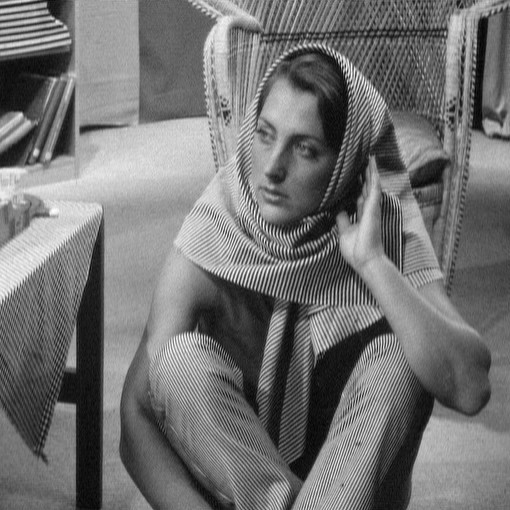

bicubic interpolation 2 times upscaled: (1020, 1020)


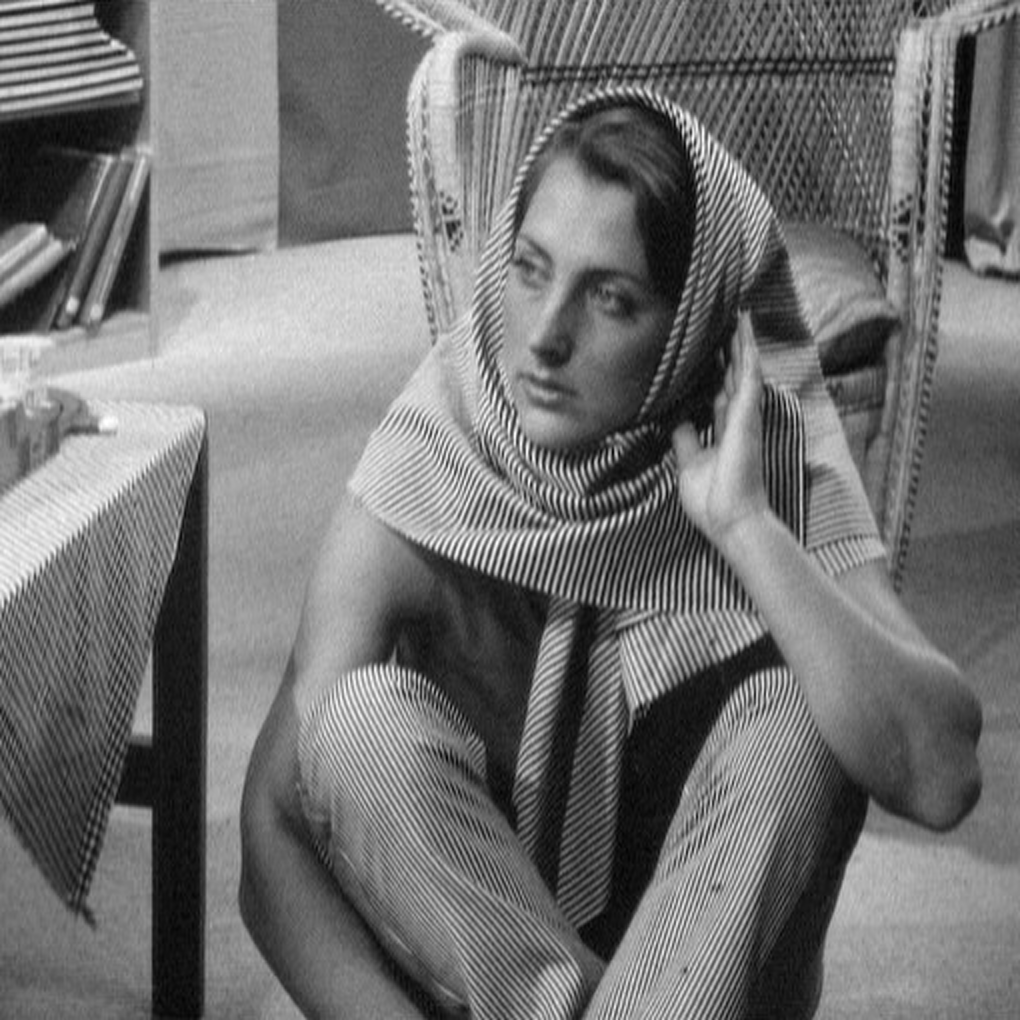

bicubic interpolation 1/2 times downscaled: (510, 510)


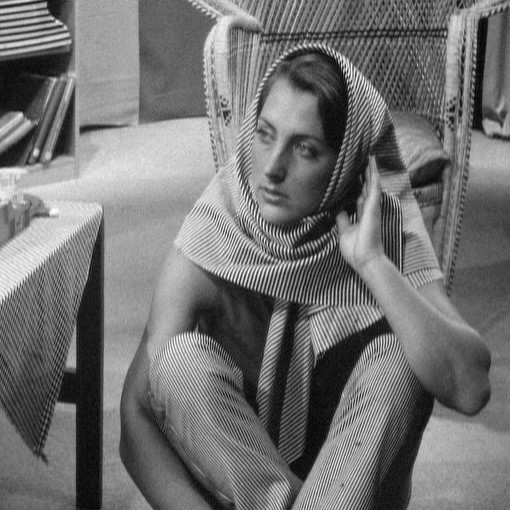

In [5]:
barbara_img = cv2.imread("/content/barbara.jpg")[:,:,0]
print("original_img:",barbara_img.shape)
cv2_imshow(barbara_img)

new_img_2_times = cv2.resize(barbara_img,(barbara_img.shape[0]*2,barbara_img.shape[1]*2), interpolation = cv2.INTER_CUBIC)
new_img_1_2_times = cv2.resize(new_img_2_times,(barbara_img.shape[0],barbara_img.shape[1]), interpolation = cv2.INTER_CUBIC)
print("bicubic interpolation 2 times upscaled:",new_img_2_times.shape)
cv2_imshow(new_img_2_times)
print("bicubic interpolation 1/2 times downscaled:",new_img_1_2_times.shape)
cv2_imshow(new_img_1_2_times)

#Question 4

\mGAUSSIAN PYRAMID

 level G 0: (510, 510)


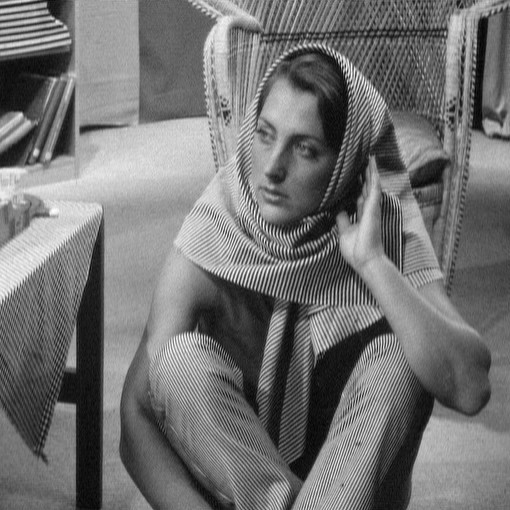


Downscaled interpolated image

 level G 1 : (255, 255)


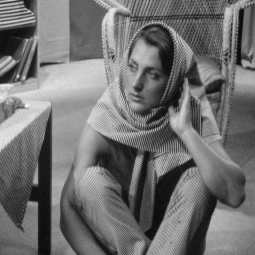


Downscaled interpolated image

 level G 2 : (127, 127)


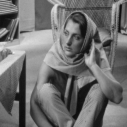


Downscaled interpolated image

 level G 3 : (63, 63)


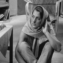


LAPLACIAN PYRAMID

 level L 3: (63, 63)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


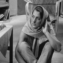


Upscaled interpolated image

 level L 3 : (127, 127)


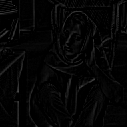


Upscaled interpolated image

 level L 2 : (255, 255)


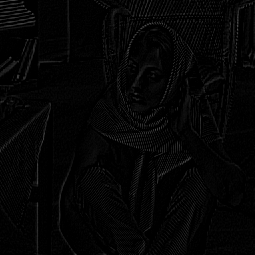


Upscaled interpolated image

 level L 1 : (510, 510)


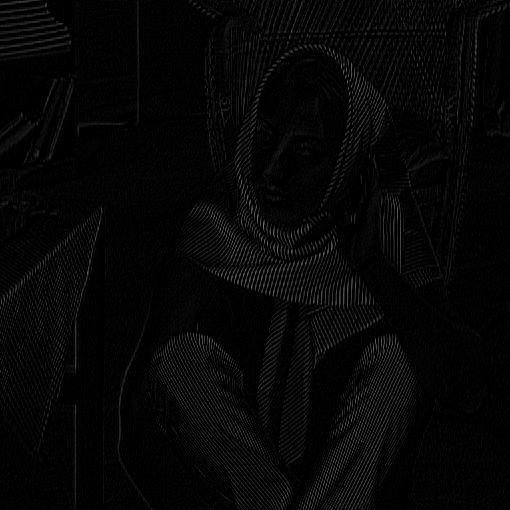

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import copy

barbara_img = cv2.imread("/content/barbara.jpg")[:,:,0]

## gaussian pyramid ##
print("\mGAUSSIAN PYRAMID")
Gaussian_pyramid = []
Gaussian_pyramid.append(barbara_img)
print("\n level G","0:",Gaussian_pyramid[0].shape)
cv2_imshow(Gaussian_pyramid[0])

for i in range(1,4):
  gaussian_blur_img = cv2.GaussianBlur(Gaussian_pyramid[i-1],(5,5),0.5)
  downampled_image = perform_downscale_linear_interpolation(gaussian_blur_img,2)
  Gaussian_pyramid.append(downampled_image.astype('uint8'))
  print("\n level G",str(i),":",Gaussian_pyramid[i].shape)
  cv2_imshow(Gaussian_pyramid[i])
  
Gaussian_pyramid = np.array(Gaussian_pyramid)

## laplacian pyramid ##
print("\nLAPLACIAN PYRAMID")
Laplcian_pyramid = []
for g in range(len(Gaussian_pyramid),0,-1):
  if g==len(Gaussian_pyramid):
    laplacian_img =  Gaussian_pyramid[g-1]
    Laplcian_pyramid.append(laplacian_img)
    print("\n level L","3:",laplacian_img.shape)
    cv2_imshow(Laplcian_pyramid[0])
    continue

  else:
    expand_img = perform_linear_interpolation(Gaussian_pyramid[g],2)

    if expand_img.shape[0]%2==0 and expand_img.shape[1]%2==0 and expand_img.shape[0]!=Gaussian_pyramid[0].shape[0] and expand_img.shape[1]!=Gaussian_pyramid[0].shape[1]:

      new_expand_img = np.zeros((expand_img.shape[0]+1,expand_img.shape[1]+1))

      for i in range(0,new_expand_img.shape[0]):
        for j in range(0,new_expand_img.shape[1]):
          if i==new_expand_img.shape[0]-1:
            new_expand_img[i][j]=new_expand_img[i-1][j]
          elif j==new_expand_img.shape[1]-1:
            new_expand_img[i][j]=new_expand_img[i][j-1]
          else:
            new_expand_img[i][j]=expand_img[i][j]

      expand_img=copy.deepcopy(new_expand_img)
    

    laplacian_img = Gaussian_pyramid[g-1]-expand_img
    print("\n level L",str(g),":",laplacian_img.shape)
    cv2_imshow(laplacian_img)
    Laplcian_pyramid.append(laplacian_img)







#Question 6

(512, 512) (128, 128)
content img coeffs


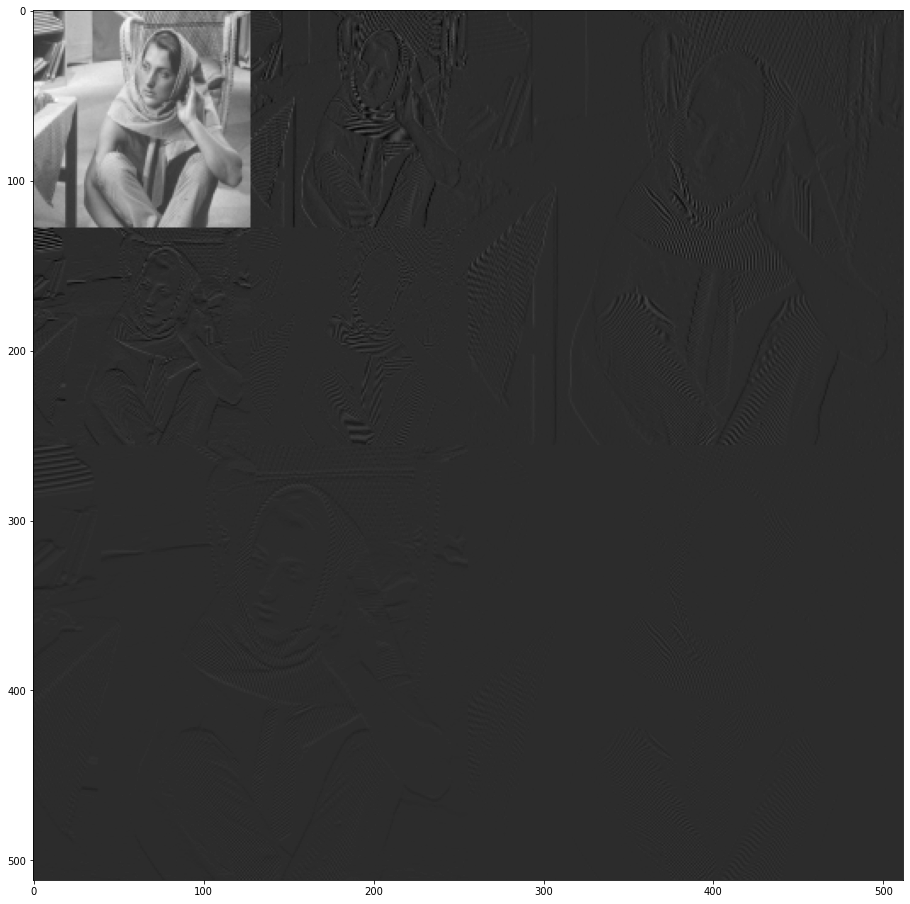

<Figure size 1296x1152 with 0 Axes>

watermark img coeffs


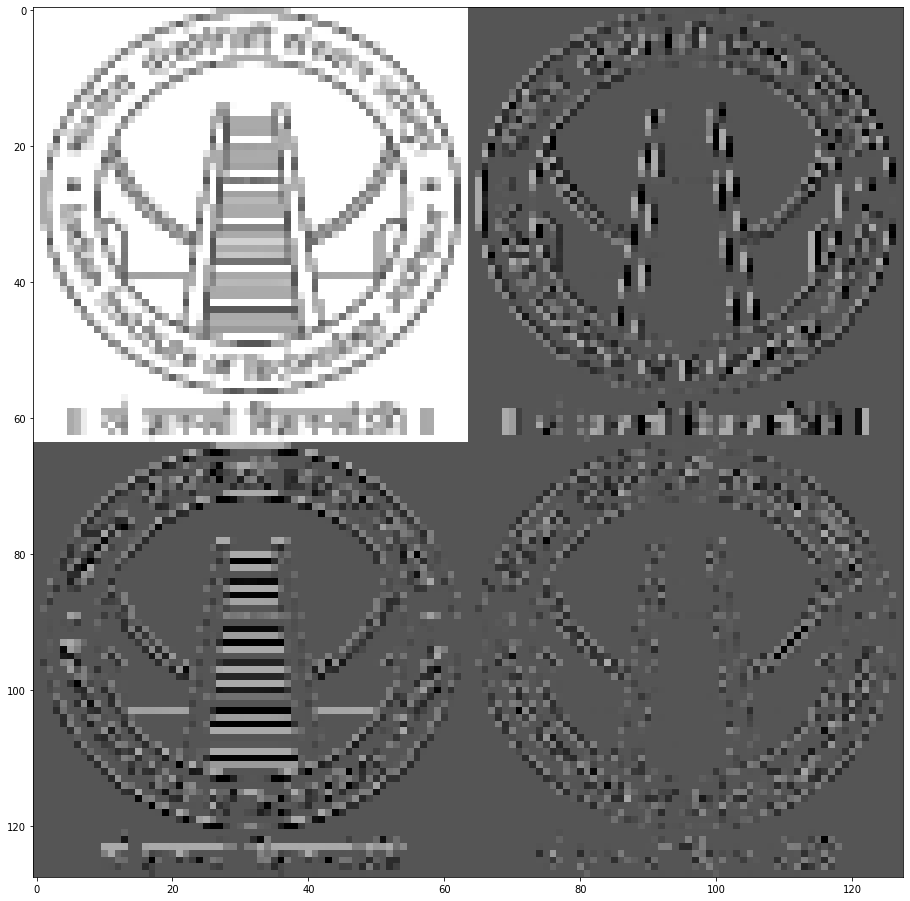

<Figure size 1296x1152 with 0 Axes>

content with watermark hidden image


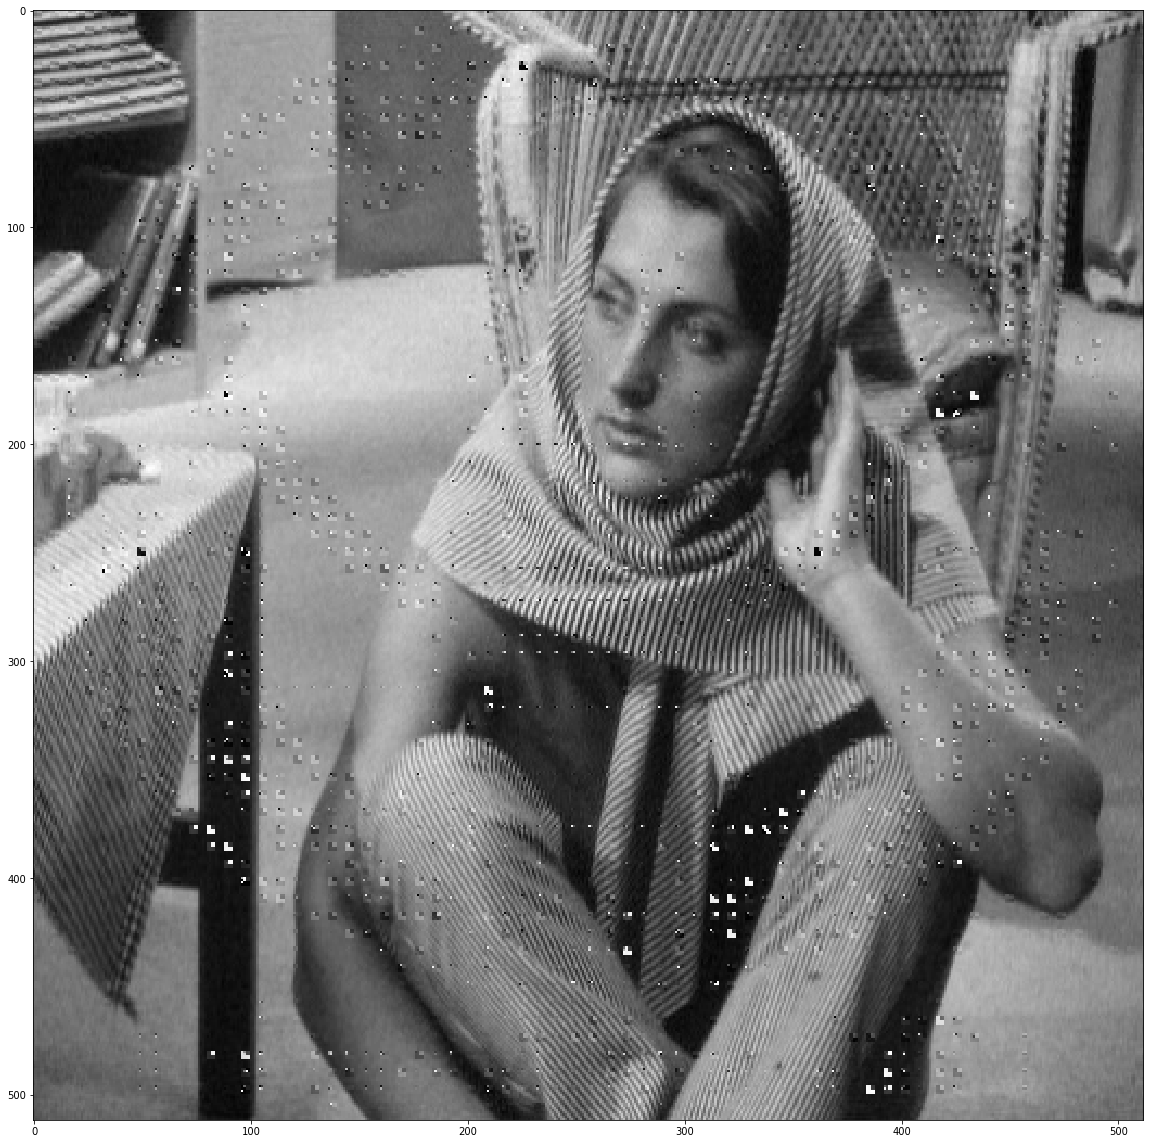

extracted watermark


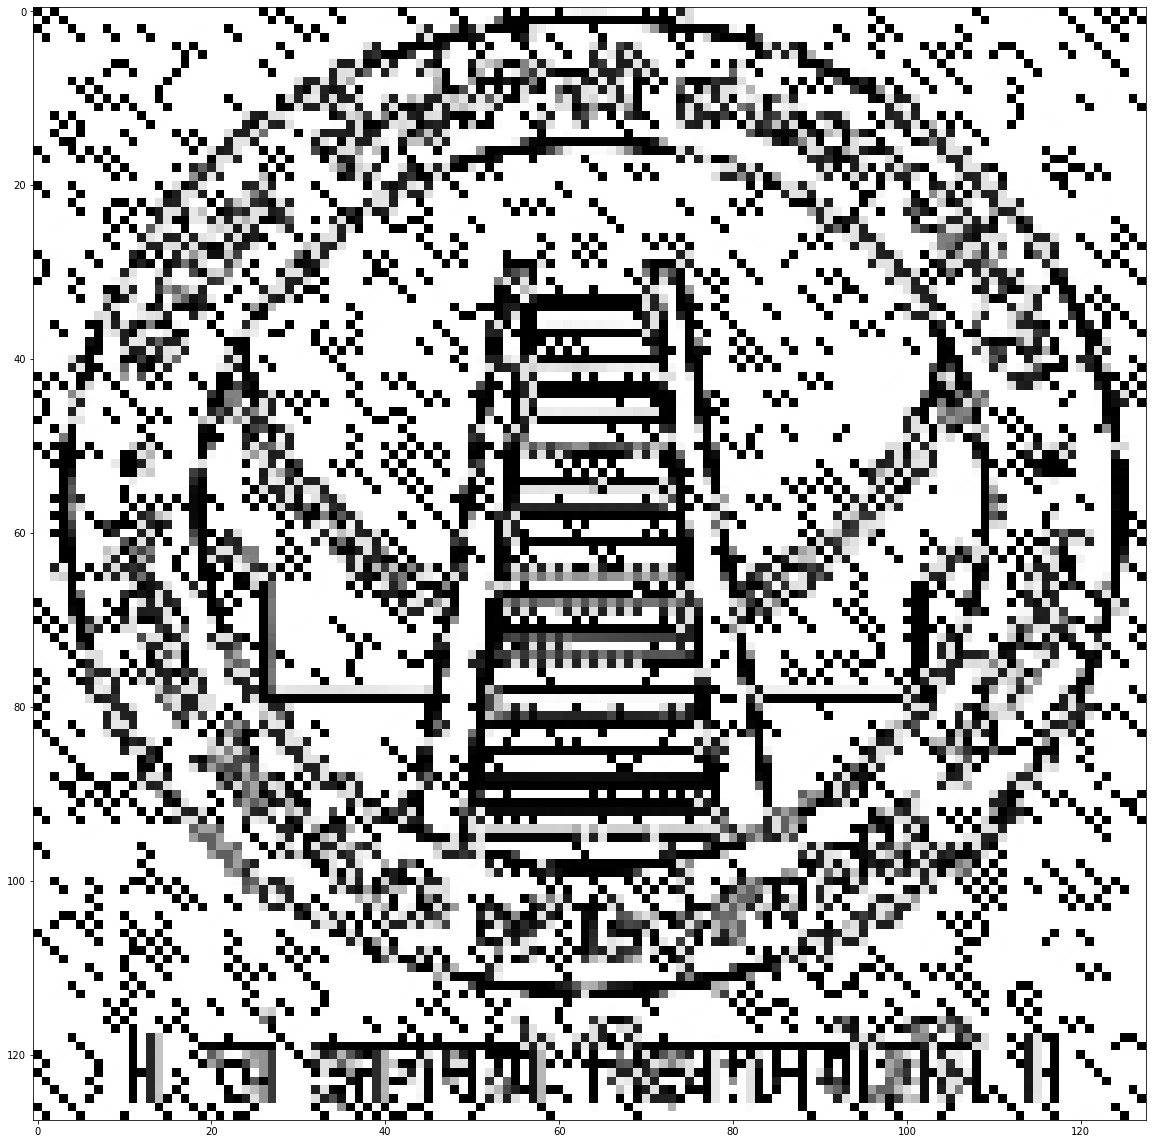

In [206]:
import pywt

def perform_wavelet_transformation(img,levels):

  img_coeffs = pywt.wavedec2(data=img,wavelet='haar',level=levels)
  return img_coeffs


def embedding_watermark2content_img(content_img_coeffs,watermark_img_coeffs):

  for i in range(len(watermark_img_coeffs[0])):
    for j in range(len(watermark_img_coeffs[0][i])):
      content_img_coeffs[2][2][i*4][j*4] = watermark_img_coeffs[0][i][j]

  for i in range(len(watermark_img_coeffs[1][0])):
    for j in range(len(watermark_img_coeffs[1][0][i])):
      content_img_coeffs[2][1][i*4][j*4] = watermark_img_coeffs[1][0][i][j]


  for i in range(len(watermark_img_coeffs[1][1])):
    for j in range(len(watermark_img_coeffs[1][1][i])):
      content_img_coeffs[2][0][i*4][j*4] = watermark_img_coeffs[1][1][i][j]


  for i in range(len(watermark_img_coeffs[1][2])):
    for j in range(len(watermark_img_coeffs[1][2][i])):
      content_img_coeffs[1][0][i*2][j*2] = watermark_img_coeffs[1][2][i][j]  

  return content_img_coeffs


def extract_watermark_from_content_img(watermark_embedded_content_img,watermark_dims):
    
    watermark_embedded_content_img =  np.float32(watermark_embedded_content_img) 
    watermark_embedded_content_img /= 255
    watermark_embedded_content_img_coeffs = perform_wavelet_transformation(watermark_embedded_content_img,2)
    watermark_coeffs = []

    watermark_extrcated_0 = np.ones((watermark_dims[0],watermark_dims[1]))
    for i in range(0,watermark_dims[0]):
      for j in range(0,watermark_dims[1]):
        watermark_extrcated_0[i][j] = watermark_embedded_content_img_coeffs[2][2][i*4][j*4]

    watermark_extrcated_1 = np.ones((watermark_dims[0],watermark_dims[1]))
    for i in range(0,watermark_dims[0]):
      for j in range(0,watermark_dims[1]):
        watermark_extrcated_1[i][j] = watermark_embedded_content_img_coeffs[2][1][i*4][j*4]

    watermark_extrcated_2 = np.ones((watermark_dims[0],watermark_dims[1]))
    for i in range(0,watermark_dims[0]):
      for j in range(0,watermark_dims[1]):
        watermark_extrcated_2[i][j] = watermark_embedded_content_img_coeffs[2][0][i*4][j*4]


    watermark_extrcated_3 = np.ones((watermark_dims[0],watermark_dims[1]))
    for i in range(0,watermark_dims[0]):
      for j in range(0,watermark_dims[1]):
        watermark_extrcated_3[i][j] = watermark_embedded_content_img_coeffs[1][0][i*2][j*2]

    watermark_coeffs.append(watermark_extrcated_0)
    watermark_coeffs.append((watermark_extrcated_1,watermark_extrcated_2,watermark_extrcated_3))
    watermark_extracted_img = pywt.waverec2(watermark_coeffs, 'haar')
    watermark_extracted_img *= 255
    watermark_extracted_img =  np.uint8(watermark_extracted_img)

    return watermark_extracted_img
    

import skimage
import skimage.io
from skimage.io import imread

def main():
  content_img = imread("/content/barbara.jpg")
  watermark_img = imread("/content/Logo_IITJ.png")
  content_img =  np.float32(content_img) 
  content_img /= 255
  watermark_img =  np.float32(watermark_img) 
  watermark_img /= 255

  print(content_img.shape,watermark_img.shape)

  content_img_coeffs = perform_wavelet_transformation(content_img,2)
  watermark_img_coeffs = perform_wavelet_transformation(watermark_img,1)

  print("content img coeffs")
  arr,coeff_slices = pywt.coeffs_to_array(content_img_coeffs)
  plt.imshow(arr,cmap='gray')
  plt.rcParams['figure.figsize'] = [16,16]
  fig=plt.figure(figsize=(18,16))
  plt.show()

  print("watermark img coeffs")
  arr,coeff_slices = pywt.coeffs_to_array(watermark_img_coeffs)
  plt.imshow(arr,cmap='gray')
  plt.rcParams['figure.figsize'] = [16,16]
  fig=plt.figure(figsize=(18,16))
  plt.show()

  embedding_watermark2content_img(content_img_coeffs,watermark_img_coeffs)

  watermark_embedded_content_img = pywt.waverec2(content_img_coeffs,'haar')
  watermark_embedded_content_img *= 255
  watermark_embedded_content_img = np.uint8(watermark_embedded_content_img)
  
  skimage.io.imsave(fname="/content/watermark_embedded_content_img.jpg", arr=watermark_embedded_content_img)
  
  extracted_watermark = extract_watermark_from_content_img(watermark_embedded_content_img,(watermark_img_coeffs[0].shape))
  skimage.io.imsave(fname="/content/extracted_watermark.jpg", arr=extracted_watermark)
  
  print("content with watermark hidden image")
  skimage.io.imshow(watermark_embedded_content_img)
  plt.show()
  print("extracted watermark")
  skimage.io.imshow(extracted_watermark)

main()
